# Exercise goals
In this exercise, we will use Python to build different visual representations of data. We'll build a: 
- box plot
- bar chart
- histogram

We will start by running a simulation of a random event, a coin flip.  We will then build on that simulation to create different types of visualizations.

# Flip coins
Lets start by building a Python class that simulates coin flips and tells us how often the flips landed on heads.

The program below "flips" the coin 1000 times. At the end, it prints out how often the coin came up heads, as a ratio.

  **Python note**:  How do we get a random number?  That's what the line `flip = random.random()` does.  The function 
  `random.random()` is built in to Python for this purpose.  It returns a decimal between 0 and 1, which gets stored 
  in `flip`.  Our program decides that a value greater than 0.5 is considered heads (`if flip > 0.5:`).

Try running this a few times to see the range of results.

**Something extra**: The number of coin flips is set in the line `a = Coinflip(1000)`.  Try changing `1000` different numbers, some much higher (such as `1,000,000`) and some much lower (such as `10`).  Run the block a few times.  How do you expect the number of coin flips to affect the percentage of heads?  When you increase the number, does the percentage (usually) move towards or away from 50%?

In [2]:
# Here, we load the different libraries we'll use in the assignment.
# By doing so, it allows us to accesss new functions that someone else has 
# come up with. For example plt.boxplot(), which allows us to make a boxplot
# with code someone else has already written for us.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
# this embeds plots within the jupyter notebook
%matplotlib inline 

class Coinflip:

    # this function is automatically run when you create an instance of 
    # Coinflip
    def __init__(self, N):
        # NOTE - style - space before assignment operator
        # NOTE - OLD - self.total_flips= N
        self.total_flips = N
        self.prob_heads = self.calc_prob() # here we call the function that will calculate P(heads)

    def calc_prob(self):
        num_heads = 0
        for _ in range(self.total_flips): # this loop will run self.total_flips number of times
            flip = random.random() # returns a number in [0, 1)
            if flip > 0.5: # a fair coinflip has equal chance of heads/tails. This is a decent approx. of that
                num_heads += 1

        # this is regular division that returns a decimal
        # if we used //, it would be integer division, which lops off the decimal portion of a number
        prob_heads =  num_heads / float (self.total_flips) ##mark convert to float
        return prob_heads


# go ahead and change the # of flips to see how P(heads) varies with different sample sizes
a = Coinflip(1000) # everytime you call a new instance of Coinflip, calc_prob is called and you get a new P(heads)
print('total flips:', a.total_flips)
print('P(heads):', a.prob_heads)

('total flips:', 1000)
('P(heads):', 0.533)


# Flip coins multiple times
Now that we have a program (the `Coinflip` class) that flips a coin to generate random data, lets use it to build a more robost data set.

We use will flip a coin 100 times (the value of `num_flips` below) and record the percentage of heads `P(heads)`.

**Python note**:  The line `b = Coinflip(num_flips)` uses the `Coinflip` class in the previous block. The `Coinflip` class *returns* the resulting percentage of heads (`P(heads)`).  The program below stores that percentage in the variable `b`.

We will then repeat this step 100 times (the value of `iterations`).  So we will get the value of `b`, the percentage of heads, 100 times.

**Python note**:  We want to make sure we don't overwrite the previous value of `b` in each iteration, as we need   
all the returned values to make a box plot. That's what the `probs` array is for.  Each value of `b` is added to `probs`. By the time the program ends, `probs` stores 100 (the value of `iterations`) different values of `b`.

In the next step we will make a box plot of the data to visualize the values of `b` that we stored in `probs`.

Try running this a few times to see the range of results.

The resulting data for `P(heads)` is shown below the following code block. 

**Something extra**: The number of coin flip trials is the value of `iterations`.  Try changing `100` to different numbers, some much higher (such as `1,000,000`) and some much lower (such as `10`).  Run the block a few times.  How do you expect the mean percentage of heads to change?  When you increase the number, does the mean move towards or away from 0.50?

In [3]:
# Here we perform the coinflips and collect the probability of heads for each
# iteration

probs = np.array([]) # instantiate an empty numpy array
# NOTE - changed to match description above
# NOTE - previously these were set to 1000
# NOTE - style - space before assignment operator
# NOTE - OLD - iterations = 1000
# NOTE - OLD - num_flips= 1000
iterations = 100 # change number of iterations here
num_flips = 100   # change number of coinflips per iteration here
for _ in range(iterations):
    b = Coinflip(num_flips) # we create a new instance of the Coinflip class we defined above
    probs = np.append(probs, b.prob_heads) # this adds each P(heads) to the back of probs

# describe() is a cool function from pandas that displays descriptive stats
# note that it doesn't display the median, which is the line inside the box of the boxplot
pd.DataFrame({"P(heads)":probs}).describe()


,P(heads)
count,100.000000
mean,0.494900
std,0.054225
min,0.340000
25%,0.457500
50%,0.495000
75%,0.530000
max,0.640000


# Learn more about the code
Lets pause for a moment and learn about code. This notebook (and the notebooks for all the other exercises) have a built in way to get more information about Python.

To see the documentation fort a Python function, simply type
`?function_name` within a cell and run the cell.

For example, running a cell with `?plt.boxplot` brings up the matplotlib documenation on boxplot.

Try running the cell below as an example. Feel free to change the line in the cell below (but keep the `?`) to see different documentation.

In [4]:
?plt.boxplot

# Make the box plot
The following code uses built in Python classes to generate a box plot based on resulting data from the previous cell.

**Something extra**: To change the box plot, you must rerun the previous code cell, then run the following code cell.  You will likely get slightly different results each time.  You can also change the `iterations` and/or the `num_flips` value in the previous code cell and rerun both cells.  How does the boxplot change? 

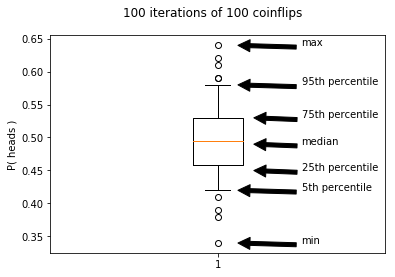

In [6]:
# this allows us to add the title later, but it also controls much more; 
# check the docs to find more.
fig = plt.figure()

# chart title
# now, when we run experiments with different #s of iterations/coinflips
# our title will automatically update to display that information.
# NOTE - style - spaces after commas in arg list
# NOTE - old - fig.suptitle('{} iterations of {} coinflips'.format(iterations,num_flips))
fig.suptitle('{} iterations of {} coinflips'.format(iterations, num_flips))

# this allows us to later add annotations with ax.annotate()
ax = fig.add_subplot(111) 

# percentile for the probabilities. To find percentile for our probabilities,
# we sort them from least to greatest, then find the observation that's greater
# than x% of all observations. Therefore, the 90th percentile P(heads) is greater
# than 90% of all probabilities in our sample. You can read more here:
# https://en.wikipedia.org/wiki/Percentile
perc = lambda x: sorted(probs)[int(num_flips*x/100)-1]

# bottom of box
ax.annotate('25th percentile', xy=(1.1, perc(25)), xytext=(1.25, perc(25)),
            arrowprops=dict(facecolor='black', shrink=0.05))
# top of box
ax.annotate('75th percentile', xy=(1.1, perc(75)), xytext=(1.25, perc(75)),
            arrowprops=dict(facecolor='black', shrink=0.05))

# there are an equal number of points greater than and less than the median
# line in the box
median = sorted(probs)[int(num_flips/2)-1]
# line within the box
ax.annotate('median', xy=(1.1, median), xytext=(1.25, median),
            arrowprops=dict(facecolor='black', shrink=0.05))

# NOTE - style - space before assignment operator
# NOTE - OLD - min= sorted(probs)[0]
min = sorted(probs)[0]
# smallest data point
ax.annotate('min', xy=(1.05, min), xytext=(1.25, min),
            arrowprops=dict(facecolor='black', shrink=0.05))
# NOTE - style - space before assignment operator
# NOTE - OLD - max= sorted(probs)[-1]
max = sorted(probs)[-1]
# largest data point
ax.annotate('max', xy=(1.05, max), xytext=(1.25, max),
            arrowprops=dict(facecolor='black', shrink=0.05))
# whis controls the whiskers. You can place them at specific percentiles: whis=[x,y]
# or place them at the min and max: whis='range'
# NOTE - style - I think this will be confusing for people who are not very
# NOTE - familiar with python. this notation isn't super clear
# NOTE - each variable assignment should probably be on its own line
whiskers = one, two = [5,95]

# whisker 1
ax.annotate(str(one)+'th percentile', xy=(1.05, perc(one)), xytext=(1.25, perc(one)),
            arrowprops=dict(facecolor='black', shrink=0.05))
# whisker 2
ax.annotate(str(two)+'th percentile', xy=(1.05, perc(two)), xytext=(1.25, perc(two)),
            arrowprops=dict(facecolor='black', shrink=0.05))

# this actually creates the plot
plt.boxplot(probs, whis=whiskers) 
# add y axis
plt.ylabel('P( heads )')
# this must be called in order to view the plot
plt.show()

# Create a bar chart
Now we will create a bar chart showing coin flips.

We will perform 100 iterations of coin flips (set in the line `for _ in range(100):`)

Each iteration will use a different number of coin flips, 1, 10, 100, and 1000. This is set in the line: `for sample_size in [1, 10, 100, 1000]:`.

The result of each iteration is added to the `probs` array.

We then print out the summary data for sample size, mean, and standard deviation, in the lines:
```python
data = pd.DataFrame(data, columns = ["Sample Size", "Mean", "Std. Dev."])
data
```
**Something extra** What do you notice about the data as the sample size increases?

In the next cell, after the Documentation cell, we will use that data to generate the bar chart.

In [7]:
# Bar Chart Demo
# It's common practice to load libraries first to expose their functionality for later
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# we will use this list to collect our data
data = []
# we iterate over our chosen # of coinflips
# for example, when sample_size is 1, we will perform 100 iterations of 1 coinflip
for sample_size in [1, 10, 100, 1000]:
    probs = []                      # this will hold the P(heads) for different iterations
    for _ in range(100):            # number of iterations
        c = Coinflip(sample_size)   # initialize our Coinflip experiment with sample_size flips
        probs.append(c.prob_heads)  # append P(heads) to probs
    probs = np.array(probs)         # convert probs from a list to a numpy array   

    # create an entry with the data we need
    # std. dev. is the square root of variance
    # NOTE - style - unnecessary whitespace
    # NOTE  - old - entry = [sample_size, probs.mean(), np.sqrt( probs.var() )]
    entry = [sample_size, probs.mean(), np.sqrt(probs.var())]
    # we append our entry to data
    data.append(entry)

# convert data from list to a pandas DataFrame
data = pd.DataFrame(data, columns = ["Sample Size", "Mean", "Std. Dev."])
# display data in the notebook
data

,Sample Size,Mean,Std. Dev.
0,1,0.49000,0.499900
1,10,0.52800,0.146342
2,100,0.49640,0.049528
3,1000,0.49896,0.014773


#  Code documentation 
Run the following cell to pull up documentation for adding text to plots.

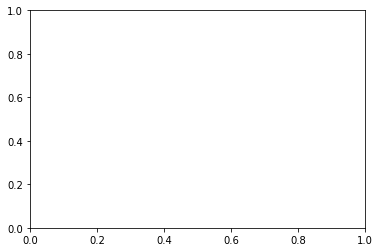

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#?ax.bar
?ax.text

# Make the bar chart
Run the following cell to see the bar chart for the coin flip data.

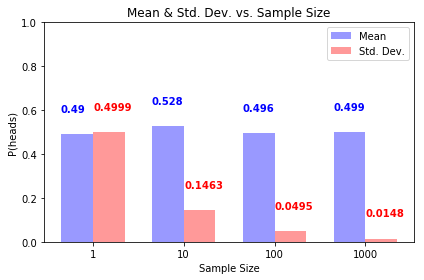

In [10]:
# these allow us to add information to our plot including title, x label, y label, etc. 
# think of fig as the picture frame and ax as the picture
fig, ax = plt.subplots()

# number of data points. Shape returns (# rows, # columns) for a 2D array
data_points = data.shape[0]
# this is similar to the range() function, which returns a generator-
# something similar to a list- from [0, data_points - 1]
index = np.arange(data_points)
# how wide our bars will be in the chart
bar_width = 0.35

# makes our bars more/less see through
opacity = 0.4

# making these columns a bit easier to access
mean = data['Mean']
sd = data['Std. Dev.']

# creates our bar for mean
rect1 = ax.bar(index, mean, bar_width,
               alpha=opacity, color='b',
               label = "Mean")
# creates our bar for std. dev.
rect2 = ax.bar(index + bar_width, sd, bar_width,
               alpha=opacity, color='r',
               label = "Std. Dev.")

# here, we print the value for mean above its bar, making it easier to read
for i, v in enumerate(mean):
    # NOTE - style - consistent spacing
    # NOTE - old - ax.text(i-.18 , v + .1, str(round(v,3)), color='b', fontweight='bold')
    ax.text(i - .18, v + .1, str(round(v, 3)), color='b', fontweight='bold')

# we print value for std. dev.
for i, v in enumerate(sd):
    # NOTE - style - consistent spacing 
    # NOTE - old - ax.text(i+.18 , v + .1, str(round(v,4)), color='r', fontweight='bold')
    ax.text(i + .18, v + .1, str(round(v, 4)), color='r', fontweight='bold')

# sets bounds on the y-axis
# we need to do this so we can see the text for value of each bar we added above
ax.set_ylim([0, 1])
ax.set_xlabel('Sample Size')
ax.set_ylabel('P(heads)')
ax.set_title('Mean & Std. Dev. vs. Sample Size')
# this correctly spaces the sample-size labels on the x-axis
# NOTE - style - spacing should imply order of operations
# NOTE - OLD - ax.set_xticks(index + bar_width / 2)
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(('1', '10', '100', '1000'))
# this displays a legend to identify each bar
ax.legend()

fig.tight_layout()
plt.show()

# Generate coin flips for a histogram
Now we will create a histogram showing coin flips.

We will perform 1000 iterations (`for _ in range(1000):`) of 100 coin flips (`e = Coinflip(100)`).

The result of each iteration multipled by 100 and stored in the `heads` array.

We then use the figure class to show data in the `heads` array as a histogram.

**Something extra**: Look at the histogram. How close is it to a normal bell curve?  Now try changing the iterations and the number of coin flips.  Do you increase or decrease the values to bring the histogram closer to a normal bell curve?

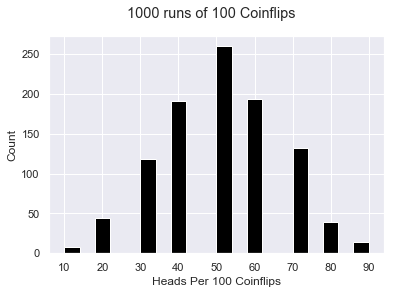

In [27]:
# Histogram Demo 
# loading libraries to access pre-built functionality
import time
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline
sns.set()

# this list will hold the number of heads 
# for each iteration
# NOTE - style - assignment operator should have spaces on both sides
# NOTE - OLD - heads=[]
heads = []
# number of iterations
for _ in range(1000):
    # initialize Coinflip with 100 flips per iteration
    e = Coinflip(10)
    # P(heads) * number of coinflips is the num_heads
    num_heads = e.prob_heads * 100
    # add this value to our list, making sure it doesn't 
    # include a decimal by casting it as int
    heads.append(int(num_heads))


fig = plt.figure()
fig.suptitle('1000 runs of 100 Coinflips')
# the bins of a histogram refer to the groupings 
# on the x-axis of a histogram
# the auto keyword sets how bins are selected.
plt.hist(heads, bins='auto', color='black')
plt.xlabel('Heads Per 100 Coinflips')
plt.ylabel('Count')
plt.show()
